In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.font_manager as fm
# 1. 폰트 매니저에 새로운 폰트 등록
fe = fm.FontEntry(
    fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', 
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

# 2. 기본 폰트로 설정
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic', 'axes.unicode_minus': False})

### Wake Word

In [14]:
df = pd.read_excel("./data/돌봄 로봇 평가 척도.xlsx", sheet_name="Wake Word").iloc[:,:8]
# 범주형 변수의 기본값 설정
df['발화 속도'] = pd.Categorical(df['발화 속도'], categories=['보통', '느림', '빠름'], ordered=False)
df['소음'] = pd.Categorical(df['소음'], categories=['무소음', 'TV 소음', '대화 소음', '생활 소음'], ordered=False)
df['화자'] = pd.Categorical(df['화자'], categories=['성인', '어린이', '노인'], ordered=False)
df

,문항 번호,거리(m),각도(°),발화 속도,소음,화자,성공 여부,실패 여부
0,1,1,0,느림,무소음,어린이,1,0
1,2,1,0,느림,무소음,성인,1,0
2,3,1,0,느림,무소음,노인,1,0
3,4,1,0,느림,TV 소음,어린이,1,0
4,5,1,0,느림,TV 소음,성인,1,0
...,...,...,...,...,...,...,...,...
319,320,10,180,빠름,대화 소음,성인,1,0
320,321,10,180,빠름,대화 소음,노인,1,0
321,322,10,180,빠름,생활 소음,어린이,0,1
322,323,10,180,빠름,생활 소음,성인,1,0


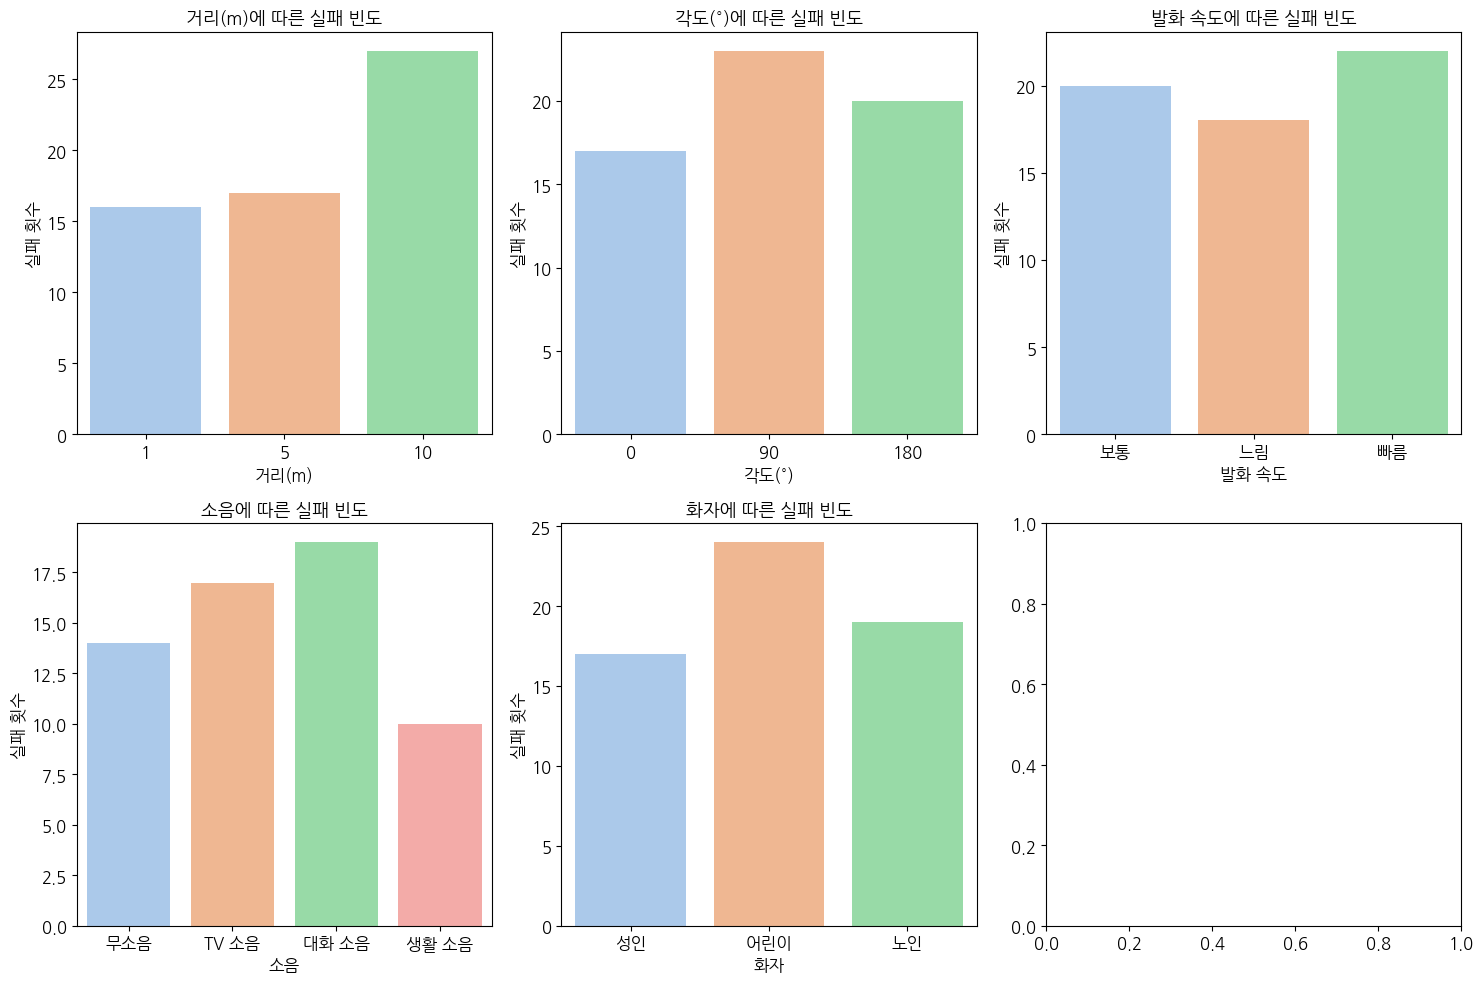

In [15]:
cols = ['거리(m)', '각도(°)', '발화 속도', '소음', '화자']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten() # 2차원 배열을 1차원으로 펼침

for i, col in enumerate(cols):
    sns.barplot(
        data=df,
        x=col,
        y='실패 여부',
        hue=col,
        estimator=sum,
        ax=axs[i],
        palette='pastel',
        errorbar=None,
        legend=False
    )
    axs[i].set_title(f'{col}에 따른 실패 빈도', fontsize=13)
    axs[i].set_ylabel('실패 횟수')

plt.tight_layout()
plt.show()

In [16]:
formula = "Q('실패 여부') ~ Q('거리(m)') + Q('각도(°)') + C(Q('발화 속도')) + C(Q('소음')) + C(Q('화자'))"
model = smf.logit(formula=formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.463327
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Q('실패 여부')   No. Observations:                  324
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Jan 2026   Pseudo R-squ.:                 0.03305
Time:                        13:53:53   Log-Likelihood:                -150.12
converged:                       True   LL-Null:                       -155.25
Covariance Type:            nonrobust   LLR p-value:                    0.3296
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3117      0.524     -4.413      0.000      -3.338      -1.285
C(

In [17]:
print("\n[오즈비 - Odds Ratio]")
print(np.exp(result.params))


[오즈비 - Odds Ratio]
Intercept              0.099097
C(Q('발화 속도'))[T.느림]    0.876616
C(Q('발화 속도'))[T.빠름]    1.129916
C(Q('소음'))[T.TV 소음]    1.277648
C(Q('소음'))[T.대화 소음]    1.478975
C(Q('소음'))[T.생활 소음]    0.669484
C(Q('화자'))[T.어린이]      1.547719
C(Q('화자'))[T.노인]       1.146657
Q('거리(m)')             1.081840
Q('각도(°)')             1.001057
dtype: float64


### STT

In [8]:
df = pd.read_excel("./data/돌봄 로봇 평가 척도.xlsx", sheet_name="STT").iloc[:,:9]
# 범주형 변수의 기본값 설정
df['발화 속도'] = pd.Categorical(df['발화 속도'], categories=['보통', '느림', '빠름'], ordered=False)
df['소음'] = pd.Categorical(df['소음'], categories=['무소음', 'TV 소음', '대화 소음', '생활 소음'], ordered=False)
df['화자'] = pd.Categorical(df['화자'], categories=['성인', '어린이', '노인'], ordered=False)
df

,문항 번호,거리(m),각도(°),발화 속도,소음,화자,CER,성공 여부,실패 여부
0,1,1,0,느림,무소음,어린이,0.019493,1,0
1,2,1,0,느림,무소음,성인,0.049726,1,0
2,3,1,0,느림,무소음,노인,0.193117,0,1
3,4,1,0,느림,TV 소음,어린이,0.047380,1,0
4,5,1,0,느림,TV 소음,성인,0.164437,0,1
...,...,...,...,...,...,...,...,...,...
319,320,10,180,빠름,대화 소음,성인,0.083441,1,0
320,321,10,180,빠름,대화 소음,노인,0.116118,0,1
321,322,10,180,빠름,생활 소음,어린이,0.051114,1,0
322,323,10,180,빠름,생활 소음,성인,0.015915,1,0


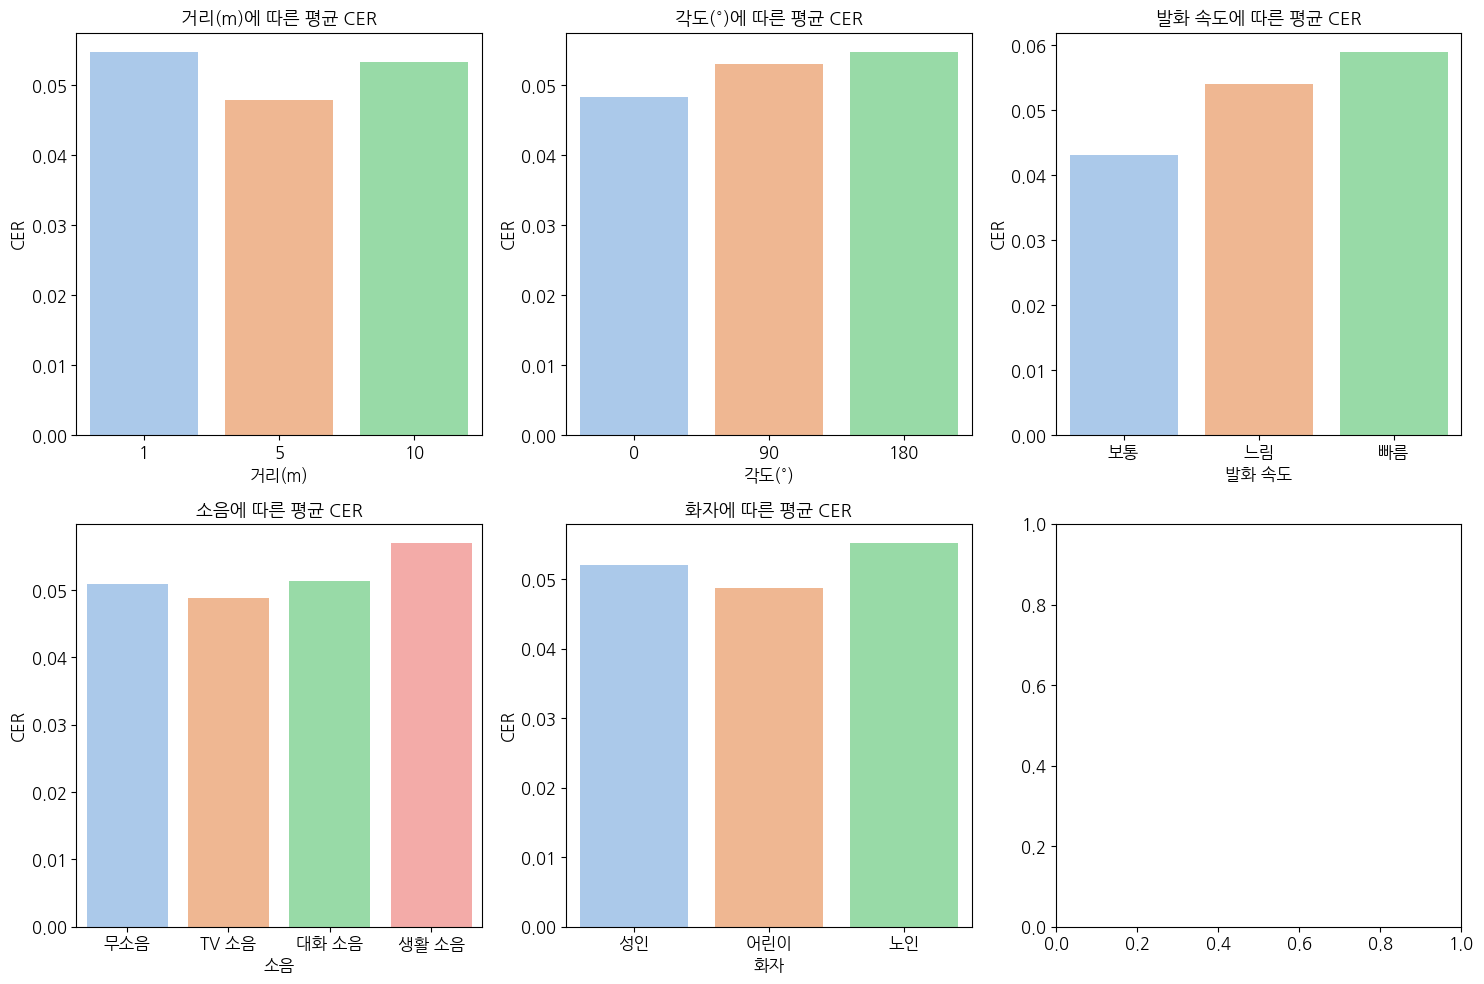

In [11]:
cols = ['거리(m)', '각도(°)', '발화 속도', '소음', '화자']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten() # 2차원 배열을 1차원으로 펼침

for i, col in enumerate(cols):
    sns.barplot(
        data=df, 
        x=col, 
        y='CER',
        hue=col, 
        estimator='mean', 
        ax=axs[i],
        palette='pastel', 
        errorbar=None, 
        legend=False
    )
    axs[i].set_title(f'{col}에 따른 평균 CER', fontsize=13)
    axs[i].set_ylabel('CER')

plt.tight_layout()
plt.show()

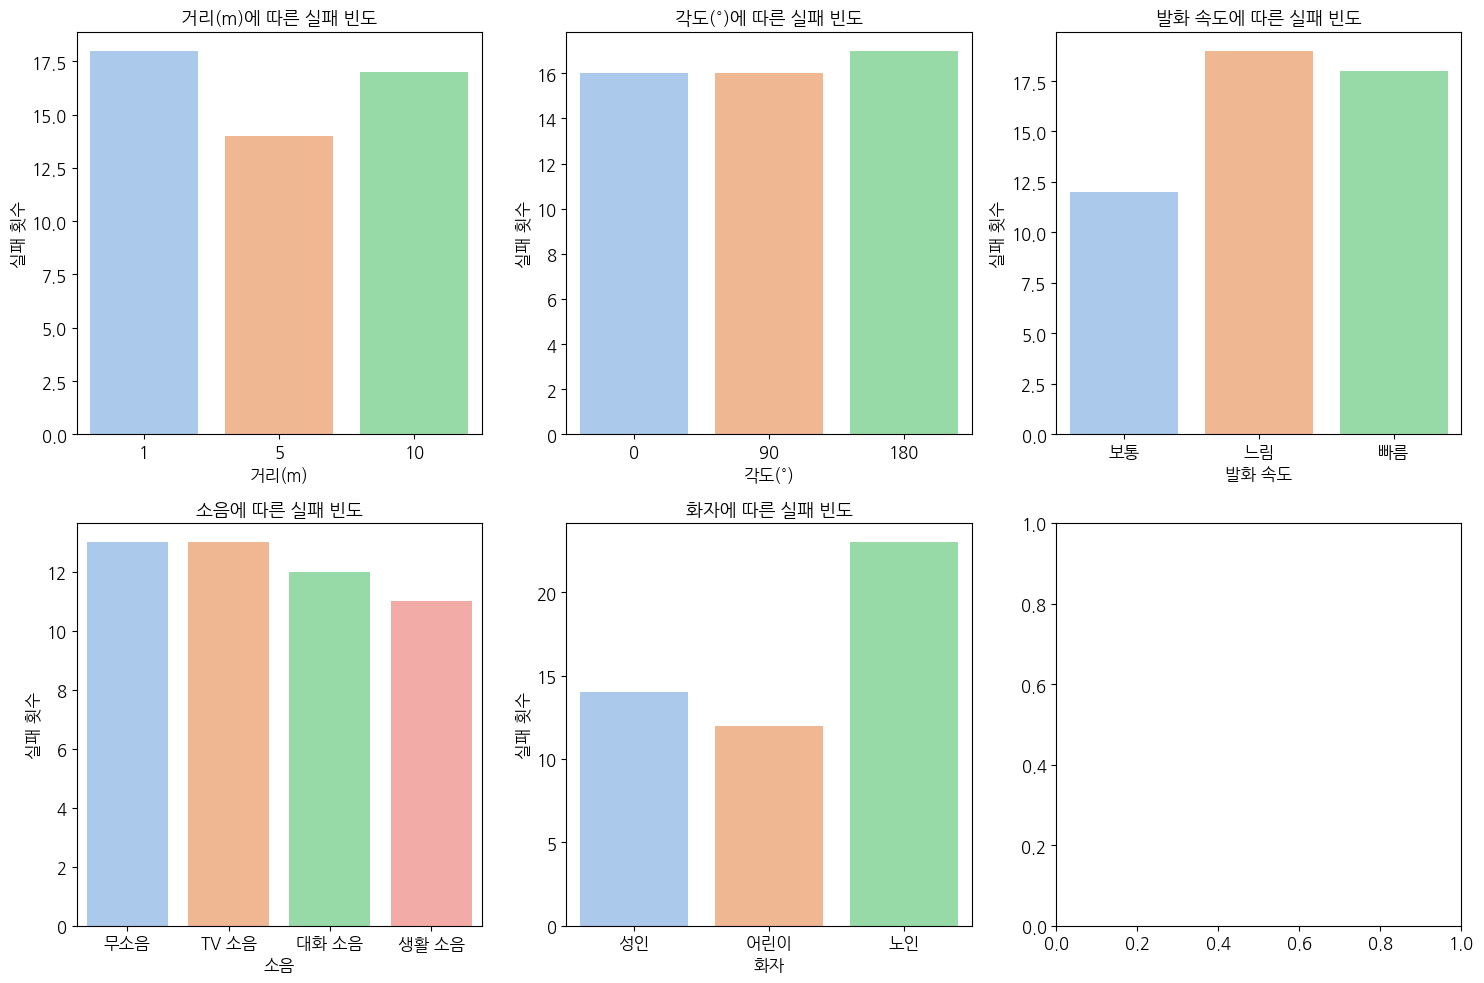

In [12]:
cols = ['거리(m)', '각도(°)', '발화 속도', '소음', '화자']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten() # 2차원 배열을 1차원으로 펼침

for i, col in enumerate(cols):
    sns.barplot(
        data=df,
        x=col,
        y='실패 여부',
        hue=col,
        estimator=sum,
        ax=axs[i],
        palette='pastel',
        errorbar=None,
        legend=False
    )
    axs[i].set_title(f'{col}에 따른 실패 빈도', fontsize=13)
    axs[i].set_ylabel('실패 횟수')

plt.tight_layout()
plt.show()

In [31]:
formula = "Q('실패 여부') ~ Q('거리(m)') + Q('각도(°)') + C(Q('발화 속도')) + C(Q('소음')) + C(Q('화자'))"
model = smf.logit(formula=formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.413570
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Q('실패 여부')   No. Observations:                  324
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            9
Date:                Wed, 28 Jan 2026   Pseudo R-squ.:                 0.02654
Time:                        17:25:36   Log-Likelihood:                -134.00
converged:                       True   LL-Null:                       -137.65
Covariance Type:            nonrobust   LLR p-value:                    0.6053
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.1990      0.558     -3.939      0.000      -3.293      -1.105
C(

In [32]:
print("\n[오즈비 - Odds Ratio]")
print(np.exp(result.params))


[오즈비 - Odds Ratio]
Intercept              0.110911
C(Q('발화 속도'))[T.느림]    1.722474
C(Q('발화 속도'))[T.빠름]    1.611735
C(Q('소음'))[T.TV 소음]    1.000000
C(Q('소음'))[T.대화 소음]    0.907709
C(Q('소음'))[T.생활 소음]    0.818382
C(Q('화자'))[T.어린이]      0.838368
C(Q('화자'))[T.노인]       1.825929
Q('거리(m)')             0.993960
Q('각도(°)')             1.000410
dtype: float64


### LLM